Итеративное вычисление и визуализация потенциала электрического поля на основе случайного распределения точечных зарядов на плоскости

Введите число зарядов: 20


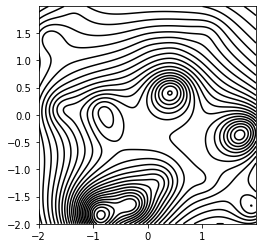

C:\Users\Andrey\AppData\Local\Temp/ipykernel_20952/3678800400.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


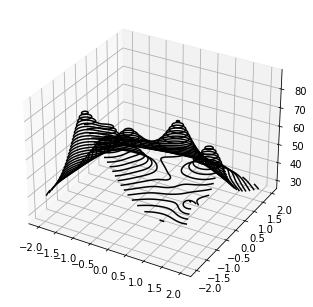

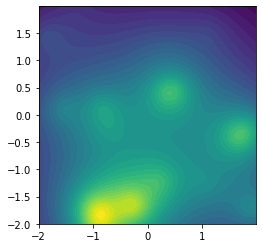

C:\Users\Andrey\AppData\Local\Temp/ipykernel_20952/3678800400.py:48: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


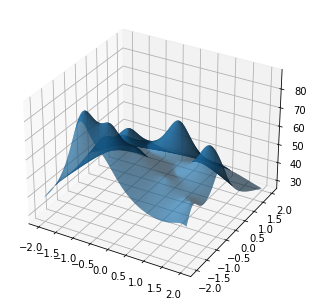

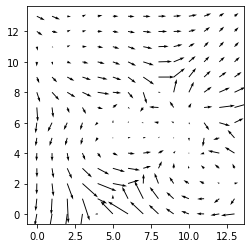

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
from numpy import gradient

# Зададим сетку
dx = 0.01
dy = 0.01
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dy)
X,Y = np.meshgrid(x, y)

a = int(input("Введите число зарядов: "))
    
t = [random.uniform(-2, 2) for i in range(a)]  # y координаты зарядов
u = [random.uniform(-2, 2) for i in range(a)]  # x координаты зарядов
q = [random.uniform(0, 10) for i in range(a)]  # величина заряда

S = ""  # сумма напряжённостей поля от всех зарядов
for i in range(a):
    # обратное расстояние до каждой точки сетки
    S = S + f"{str(q[i])}/(({str(t[i])} - y)**2+({str(u[i])} - x)**2 + 0.1)**0.5"  
    if i < a-1:
        S = S + "+"

def F(x,y):
    return eval(S)

# 2D эквипотенциальные линии
plt.contour(X, Y, F(X,Y), 35, colors='black')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 3D эквипотенциальные линии
fig = plt.figure()
ax = Axes3D(fig)
plt.contour(X, Y, F(X,Y), 35, colors='black')
plt.show()

# тепловая карта потенциала
plt.contourf(X, Y, F(X,Y), 35)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 3D визуализация потенциала
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,F(X,Y), rstride=1, cstride=1)
plt.show()

# задание разреженной сетки, вычисление градиента потенциала (электрического поля) 
dx = 0.3; dy = 0.3
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dy)
x,y = np.meshgrid(x,y)
F = eval(S)
Ex, Ey = gradient(F)

# визуализация электрического поля
plt.quiver(-Ex, -Ey)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()